In [27]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['normal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
df = pd.read_csv('/cellar/users/ramarty/Data/kir/TCGA/data_frames/all_the_good_stuff.csv', index_col=0)

In [29]:
len(df[(df.tissue == 'CESC')|(df.tissue == 'UCS')])

86

In [30]:
t = (df.tissue == 'CESC')|(df.tissue == 'UCS')

In [31]:
inhibitory = df[t].inhibitory > df[t].inhibitory.quantile(0.5)

In [25]:
df.columns

Index([u'KIR3DL3', u'KIR3DP1', u'KIR2DL4', u'KIR3DL2', u'KIR2DP1', u'KIR2DL1',
       u'KIR2DS4', u'KIR2DS3', u'KIR2DS2', u'KIR2DS5', u'KIR3DS1', u'KIR2DS1',
       u'KIR2DL2', u'KIR3DL1', u'KIR2DL3', u'KIR2DL5A', u'age_at_diagnosis',
       u'days_to_death', u'days_to_last_followup', u'ethnicity', u'gender',
       u'race', u'tissue', u'vital_status', u'B cells naive',
       u'B cells memory', u'Plasma cells', u'T cells CD8',
       u'T cells CD4 naive', u'T cells CD4 memory resting',
       u'T cells CD4 memory activated', u'T cells follicular helper',
       u'T cells regulatory (Tregs)', u'T cells gamma delta',
       u'NK cells resting', u'NK cells activated', u'Monocytes',
       u'Macrophages M0', u'Macrophages M1', u'Macrophages M2',
       u'Dendritic cells resting', u'Dendritic cells activated',
       u'Mast cells resting', u'Mast cells activated', u'Eosinophils',
       u'Neutrophils', u'P-value', u'Pearson Correlation', u'RMSE', u'Bcells',
       u'CAFs', u'CD4_Tcells', u

In [16]:
for cell in ['T cells CD8', 'NK cells resting', 'NK cells activated', 'NKcells', 'CD8_Tcells']:
    print sp.ttest_ind(df[t&inhibitory][cell], df[t&~inhibitory][cell])

Ttest_indResult(statistic=-1.680289426730533, pvalue=0.0966164557402218)
Ttest_indResult(statistic=-0.9056287732280709, pvalue=0.3677227215719342)
Ttest_indResult(statistic=-1.5093869811467568, pvalue=0.13495235194502528)
Ttest_indResult(statistic=-0.28554044801073414, pvalue=0.7759330413241117)
Ttest_indResult(statistic=-2.3457769084664215, pvalue=0.02134409697202939)


In [71]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
                                index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
                                index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                                index_col=0)

In [108]:
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.cancer.PHBR.csv',
                                index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_mutations.cancer.PHBR.csv',
                                index_col=0)

In [109]:
patient_mutations.shape, patient_affinitiesI.shape, patient_affinitiesII.shape

((9176, 1018), (5942, 1018), (5942, 1018))

In [110]:
many_patients = list(df[t][inhibitory].index)
few_patients = (list(df[t][~inhibitory].index))
other_patients = [x for x in df.index if x not in many_patients+few_patients and x in patient_affinities.index]

In [111]:
patient_affinitiesI.loc[many_patients].mean(axis=1).mean()

3.263681279886141

In [112]:
patient_affinitiesI.loc[few_patients].mean(axis=1).mean()

3.3410851257502254

In [113]:
patient_mutations.loc[many_patients].mean(axis=1).mean()

0.0015348722986247543

In [114]:
patient_mutations.loc[few_patients].mean(axis=1).mean()

0.0014173449340443452

Get the PHBR scores of the observed mutations

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
patient_affinities.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-02-0003,8.192318,12.610138,0.561641,4.660101,14.391665,0.220919,4.281047,14.003648,5.115616,2.589041,...,12.627785,16.526459,7.236090,0.939944,1.636364,20.198295,3.536356,0.336606,0.356552,0.131961
TCGA-02-0033,7.402495,2.895448,2.525261,0.610539,10.076580,1.043046,2.391201,4.878120,2.572530,2.110847,...,11.345070,5.132615,3.218709,4.645128,0.475590,7.233886,1.730472,0.312188,2.058811,0.441847
TCGA-02-0047,7.439759,8.762255,6.725895,1.471782,15.400653,0.205625,2.544861,14.577646,11.253003,0.173633,...,34.055701,19.521127,4.700519,4.444964,1.043478,15.865278,2.907045,0.442105,2.934783,2.151394
TCGA-02-0055,2.047533,1.854651,10.074397,0.443036,0.957902,1.208768,0.980926,4.407298,0.666515,3.246911,...,3.579627,3.434619,11.010495,2.290909,0.160612,6.887191,0.447077,1.929064,1.627907,1.172414
TCGA-02-2466,1.980968,1.614350,1.907821,1.275458,8.178074,1.027902,1.368945,0.719084,1.491943,0.968920,...,10.348993,3.569482,8.524514,2.527537,0.518110,6.831963,0.503793,0.313840,0.117139,0.308923


In [120]:
patient_affinitiesI.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-02-0003,8.192318,12.610138,0.561641,4.660101,14.391665,0.220919,4.281047,14.003648,5.115616,2.589041,...,12.627785,16.526459,7.236090,0.939944,1.636364,20.198295,3.536356,0.336606,0.356552,0.131961
TCGA-02-0033,7.402495,2.895448,2.525261,0.610539,10.076580,1.043046,2.391201,4.878120,2.572530,2.110847,...,11.345070,5.132615,3.218709,4.645128,0.475590,7.233886,1.730472,0.312188,2.058811,0.441847
TCGA-02-0047,7.439759,8.762255,6.725895,1.471782,15.400653,0.205625,2.544861,14.577646,11.253003,0.173633,...,34.055701,19.521127,4.700519,4.444964,1.043478,15.865278,2.907045,0.442105,2.934783,2.151394
TCGA-02-0055,2.047533,1.854651,10.074397,0.443036,0.957902,1.208768,0.980926,4.407298,0.666515,3.246911,...,3.579627,3.434619,11.010495,2.290909,0.160612,6.887191,0.447077,1.929064,1.627907,1.172414
TCGA-02-2466,1.980968,1.614350,1.907821,1.275458,8.178074,1.027902,1.368945,0.719084,1.491943,0.968920,...,10.348993,3.569482,8.524514,2.527537,0.518110,6.831963,0.503793,0.313840,0.117139,0.308923


In [125]:
few_observed, many_observed = [], []
for mutation in patient_affinitiesI.columns:
    few_observed.extend(list(patient_affinitiesI.loc[few_patients][patient_mutations[mutation].astype(bool)][mutation]))
    many_observed.extend(list(patient_affinitiesI.loc[many_patients][patient_mutations[mutation].astype(bool)][mutation]))

In [147]:
uc_observed, other_observed = [], []
for mutation in patient_affinities.columns:
    uc_observed.extend(list(patient_affinities.loc[few_patients+many_patients][patient_mutations[mutation].astype(bool)][mutation]))
    other_observed.extend(list(patient_affinities.loc[other_patients][patient_mutations[mutation].astype(bool)][mutation]))

In [148]:
sp.mannwhitneyu(uc_observed, other_observed)

MannwhitneyuResult(statistic=157480.0, pvalue=0.0034055883823857244)

In [149]:
plotting_df = pd.DataFrame({'PHBR': uc_observed + other_observed,
                           'Tissue': ['UCEC or UCS' for x in uc_observed] + ['Other' for x in other_observed]})

In [150]:
plotting_df = plotting_df.dropna()

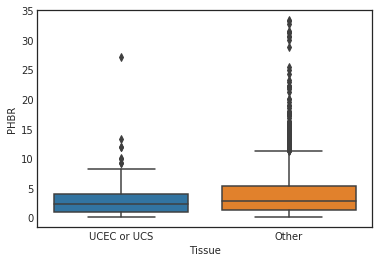

In [151]:
sns.boxplot(x='Tissue', y='PHBR', data=plotting_df)

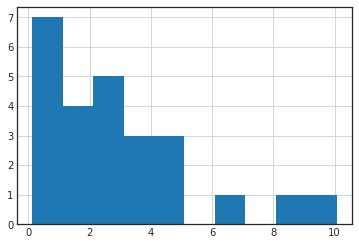

In [127]:
pd.Series(many_observed).hist()

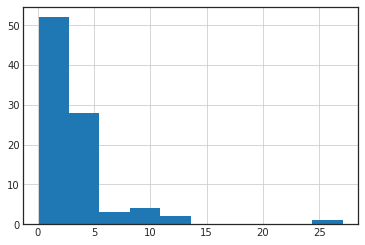

In [128]:
pd.Series(few_observed).hist()

In [56]:
patient_mutations.loc[few_patients, mutation].as_type(bool)

AttributeError: 'Series' object has no attribute 'as_type'

In [18]:
sp.spearmanr(df[t][cell], df[t]['inhibitory'])

SpearmanrResult(correlation=-0.15189001725679116, pvalue=0.1626924783954203)

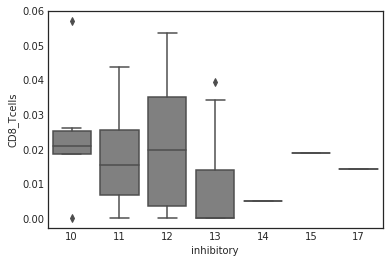

In [19]:
sns.boxplot(x='inhibitory', y='CD8_Tcells', data=df[t], color='grey')

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


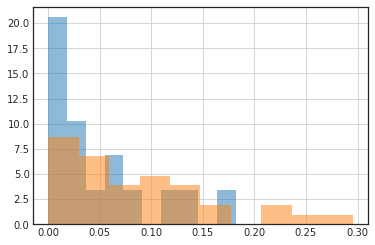

In [9]:
df[t&inhibitory]['T cells CD8'].hist(normed=True, alpha=0.5)
df[t&~inhibitory]['T cells CD8'].hist(normed=True, alpha=0.5)

In [10]:
# is there lower MHC expression in these tissue types? Higher coverage?? 

### MHC expression

In [11]:
all_dfs = []
for a, b in zip(range(0, 10000, 1000), range(1000, 11000, 1000)):
    tmp = pd.read_csv('/cellar/users/ramarty/Data/kir/biological/tumor_infiltration/dataframes/expression.{0}_{1}.df'.format(a, b),
                 index_col=0).loc[['HLA-A', 'HLA-B', 'HLA-C']]
    all_dfs.append(tmp.transpose())

df_exp = pd.concat(all_dfs, sort=True)

In [12]:
df_exp.head()

symbol,HLA-A,HLA-B,HLA-C
TCGA-J2-8192,115158,208291,127414
TCGA-CJ-4885,212257,261935,166581
TCGA-AS-3777,62970,119578,70830
TCGA-80-5611,89574,146908,129418
TCGA-A8-A06R,62969,94772,51212


In [25]:
combined_exp = pd.merge(df, df_exp, left_index=True, right_index=True)
t = (combined_exp.tissue == 'CESC')|(combined_exp.tissue == 'UCS')
inhibitory = combined_exp[t].inhibitory > combined_exp[t].inhibitory.quantile(0.5)

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


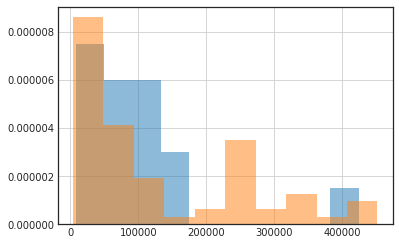

In [26]:
combined_exp[t&inhibitory]['HLA-B'].hist(normed=True, alpha=0.5)
combined_exp[t&~inhibitory]['HLA-B'].hist(normed=True, alpha=0.5)

In [27]:
print sp.ttest_ind(combined_exp[t&inhibitory]['HLA-B'], combined_exp[t&~inhibitory]['HLA-B'])
print sp.ttest_ind(combined_exp[t&inhibitory]['HLA-A'], combined_exp[t&~inhibitory]['HLA-A'])

Ttest_indResult(statistic=-0.8177019177006319, pvalue=0.41584082037495274)
Ttest_indResult(statistic=-0.6972904100057755, pvalue=0.4875465153378904)


### Coverage

In [52]:
mhc2_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/comprehensive_df.csv',
                     index_col=0)

In [53]:
t = (mhc2_df.Tissue == 'CESC')|(mhc2_df.Tissue == 'UCS')

In [55]:
combined = pd.merge(df, mhc2_df, left_index=True, right_index=True)
t = (combined.tissue == 'CESC')|(combined.tissue == 'UCS')
inhibitory = combined[t].inhibitory > combined[t].inhibitory.quantile(0.5)

In [32]:
sp.ttest_ind(combined[t&inhibitory].classI, combined[t&~inhibitory].classI)

Ttest_indResult(statistic=1.180049874814244, pvalue=0.24248826108130983)

In [56]:
sp.ttest_ind(combined[t&inhibitory].Cytolytic, combined[t&~inhibitory].Cytolytic)

Ttest_indResult(statistic=-1.2245664236527674, pvalue=0.22537116313469427)

In [71]:
list(combined[t].columns)

['KIR3DL3',
 'KIR3DP1',
 'KIR2DL4',
 'KIR3DL2',
 'KIR2DP1',
 'KIR2DL1',
 'KIR2DS4',
 'KIR2DS3',
 'KIR2DS2',
 'KIR2DS5',
 'KIR3DS1',
 'KIR2DS1',
 'KIR2DL2',
 'KIR3DL1',
 'KIR2DL3',
 'KIR2DL5A',
 'KIR2DL5B',
 'age_at_diagnosis',
 'days_to_death',
 'days_to_last_followup',
 'ethnicity',
 'gender',
 'race',
 'tissue',
 'vital_status',
 'B cells naive_x',
 'B cells memory_x',
 'Plasma cells_x',
 'T cells CD8_x',
 'T cells CD4 naive_x',
 'T cells CD4 memory resting_x',
 'T cells CD4 memory activated_x',
 'T cells follicular helper_x',
 'T cells regulatory (Tregs)_x',
 'T cells gamma delta_x',
 'NK cells resting_x',
 'NK cells activated_x',
 'Monocytes_x',
 'Macrophages M0_x',
 'Macrophages M1_x',
 'Macrophages M2_x',
 'Dendritic cells resting_x',
 'Dendritic cells activated_x',
 'Mast cells resting_x',
 'Mast cells activated_x',
 'Eosinophils_x',
 'Neutrophils_x',
 'P-value_x',
 'Pearson Correlation_x',
 'RMSE_x',
 'A1',
 'A2',
 'B1',
 'B2',
 'C1',
 'C2',
 'A1_',
 'A2_',
 'B1_',
 'B2_',
 'C1

### Known interactions

In [66]:
binding_pairs_A = [['A*23:01', 'KIR3DL1'], ['A*03:01', 'KIR3DL2'], ['A*23:04', 'KIR3DL1'], ['A*23:02', 'KIR3DL1']]

binding_pairs_B =  [['B*53:01', 'KIR3DL1'], ['B*52:01', 'KIR3DL1'], ['B*44:03', 'KIR3DL1'], ['B*58:01', 'KIR3DL1'],
                 ['B*15:16', 'KIR3DL1'], ['B*49:01', 'KIR3DL1'], ['B*51:16', 'KIR3DL1'], ['B*57:04', 'KIR3DL1']]

binding_pairs_C = [#['C*04:01', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3', 'KIR2DS4']], 
                    ['C*04:01', ['KIR2DL1', 'KIR2DL2', 'KIR2DL3']], 
                    ['C*04:01', ['KIR2DS1', 'KIR2DS4']], 
                   #['C*16:01', ['KIR2DL2', 'KIR2DL3', 'KIR2DS4', 'KIR2DS4']],
                    ['C*16:01', ['KIR2DL2', 'KIR2DL3']],
                    ['C*16:01', ['KIR2DS4']],
                   #['C*17:01', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3']], 
                    ['C*17:01', ['KIR2DL1', 'KIR2DL2', 'KIR2DL3']], 
                    ['C*17:01', ['KIR2DS1']], 
                   #['C*02:02', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3', 'KIR2DS4']],
                    ['C*02:02', ['KIR2DL1', 'KIR2DL2', 'KIR2DL3']],
                    ['C*02:02', ['KIR2DS1', 'KIR2DS4']],
                   ['C*03:04', ['KIR2DL2', 'KIR2DL3']], 
                   ['C*07:01', ['KIR2DL2', 'KIR2DL3']],
                   ['C*07:02', ['KIR2DL2', 'KIR2DL3']], 
                   ['C*03:02', ['KIR2DL2', 'KIR2DL3']],
                   ['C*18:01', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2']], 
                   ['C*18:02', ['KIR2DL2', 'KIR2DL3']]]

In [73]:
import lifelines
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [81]:
predicted_total = 1
total = 0
tissue ='uterus'
for i, binding_pair in enumerate(binding_pairs_C):

    t = (combined.tissue == 'CESC')|(combined.tissue == 'UCS')
    df_t = combined[t]

    T = df_t.days_to_death
    C = df_t.days_to_last_followup

    hla_allele = binding_pair[0]
    kir_gene = binding_pair[1]
    hla = (df_t.C1_ == hla_allele) | (df_t.C2_ == hla_allele)
    kir = (df_t[kir_gene] > 0)

    if sum(C[hla&kir]) > 5 and sum(C[~(hla&kir)]) > 5:
        results = logrank_test(T[hla&kir], T[~(hla&kir)], C[hla&kir], C[~(hla&kir)], alpha=.99 )
        print tissue, results.p_value * predicted_total
        total += 1
        if results.p_value * predicted_total < 0.05:
            print len(df_t[hla&kir]), len(df_t[~(hla&kir)])
            print i, tissue, hla_allele, kir_gene, results.p_value, results.p_value * predicted_total
            ax = plt.subplot(111)
            kmf.fit(T[hla&kir], event_observed=C[hla&kir], label="Binding - {0}".format(sum(C[hla&kir])))
            kmf.plot(ax=ax, ci_force_lines=False)
            kmf.fit(T[~(hla&kir)], event_observed=C[~(hla&kir)], label="Non-Binding - {0}".format(sum(C[~(hla&kir)])))
            kmf.plot(ax=ax, ci_force_lines=False)
            plt.title('{0},{1} - {2}'.format(hla_allele, kir_gene, str(results.p_value * predicted_total)))
            plt.xlim(0, 1825)
            #plt.savefig('/cellar/users/ramarty/Data/kir/figures/survival.{0}.{1}_{2}.pdf'.format(tissue, hla_allele, kir_gene))
            plt.show()
            plt.clf()
print total

ValueError: operands could not be broadcast together with shapes (192,) (3,) 